In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import auc
import numpy as np

In [18]:
# Define plot function: error vs power (semilogx)
def plot_results(r: pd.DataFrame):
    fig, ax = plt.subplots(1,1, figsize=(6, 3))
    kwargs = {"lw":2, "ms":4, "alpha": 1}

    # Theoretical bound
    ax.semilogx(r["error"], r["power_bound"], "r-^", label = 'Theoretical', **kwargs)

    # BN
    ax.semilogx(r["error"], r["power_BN"], "-o", label = 'BN', **kwargs)

    # CN (avg, min, max)
    ax.semilogx(r["error"], r["CN_avg"], "-s", label = f'CN Avg', **kwargs)
    ax.fill_between(r["error"], r["CN_min"], r["CN_max"], color="b", alpha=0.5)

    # Plot info
    ax.set(title='Semilogx')
    ax.legend()

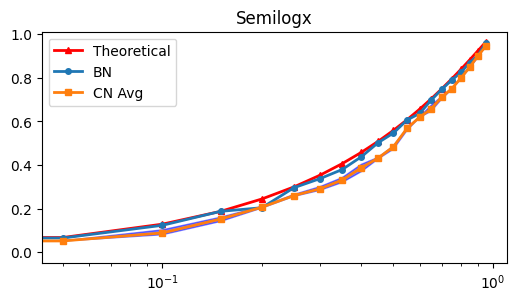

In [19]:
# Import all results
path = "./results/cont"
results = os.listdir(path)

# Choose which one to plot
r_path = f"{path}/exp_2-compl22.csv"
results = pd.read_csv(r_path)

# Plot results
plot_results(results)

In [20]:
results.head()

,error,power_bound,power_BN,CN_avg,CN_max,CN_min
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.05,0.067258,0.065000,0.051533,0.052000,0.051000
2,0.10,0.128559,0.123333,0.088333,0.102333,0.080000
3,0.15,0.187241,0.187333,0.152200,0.160333,0.141000
4,0.20,0.244062,0.204000,0.206333,0.209667,0.202667


In [21]:
# Compute AUCs
print(f"BN AUC: {auc(results['error'], results['power_BN'])}")
print(f"CN Avg AUC: {auc(results['error'], results['CN_avg'])}")

BN AUC: 0.4816333333333333
CN Avg AUC: 0.45047499999999985
